# Modelo EDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bd = pd.read_csv("data.csv")
# x , y
# -2 , 170
# -1.5, 150
# .....

In [3]:
def decodificar(bits, Imin, Imax, n_bits=8):
    """Convierte un cromosoma binario en coeficientes reales."""
    A = []
    for i in range(0, len(bits), n_bits):
        bloque = bits[i:i+n_bits]
        entero = int("".join(map(str, bloque)), 2)
        valor = Imin + (entero / (2**n_bits - 1)) * (Imax - Imin)
        A.append(valor)
    return A

In [4]:
def formula(A, X):
    """Evalúa el polinomio de grado 5 en los puntos X."""
    return (A[0] + (A[1]*X) + (A[2]*X**2) + (A[3]*X**3) + (A[4]*X**4) + (A[5]*X**5))

In [5]:
# Recibe una matriz de soluciones y luego evalua el error cuadratico medio en cada solución
def fitness(Matriz_solucion, X, Y, Imin, Imax, n_bits):
    datatos = []
    for i in range(len(Matriz_solucion)):
        A = decodificar(Matriz_solucion[i], Imin, Imax, n_bits)
        datatos.append(A)
    y_pred = formula(datatos, X)
    MSE = np.mean((Y - y_pred)**2)
    return MSE

In [6]:
def generarPoblacion(n, l):

    Poblacion =  np.random.randint(0, 2, size=(n, l))
    return Poblacion


In [7]:
X = bd["x"].values
Y = bd["y"].values
PoblacionMayor = []
for i in range(3):
    PoblacionMayor.append(generarPoblacion(6, 8))
print(PoblacionMayor)


fitness_vals = []
for i in range(len(PoblacionMayor)):
    fitness_valsafjdk = fitness(PoblacionMayor[i], X, Y, -10, 10, 8)
    fitness_vals.append(fitness_valsafjdk)
print(fitness_vals)

[array([[1, 0, 0, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 1, 1]], dtype=int32), array([[0, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 1]], dtype=int32), array([[0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0]], dtype=int32)]
[np.float64(1445.4156944566107), np.float64(12283.107375347558), np.float64(2397.715418992274)]


In [8]:
def graficar_resultado(X, Y, coef):
    # Ordenar X para que la curva salga bonita
    x_line = np.linspace(min(X), max(X), 200)
    y_line = formula(coef, x_line)

    plt.figure(figsize=(8,5))
    # Datos originales
    plt.scatter(X, Y, color="blue", label="Datos reales", alpha=0.7)
    # Polinomio ajustado
    plt.plot(x_line, y_line, color="red", linewidth=2, label="Polinomio EDA")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste del polinomio con EDA")
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
X = bd["x"].values
Y = bd["y"].values
n_coef=6
n_bits=8
poblacion_size=20
generaciones= 100
elite_ratio=0.5
Imin = -10
Imax = 10
verbose=True

genoma = n_coef * n_bits
probabilidades = np.full(genoma, 0.5)

for g in range(generaciones):
        # Generar población
    poblacion = [muestrear(probabilidades) for _ in range(poblacion_size)]
    fitness_vals = [fitness(ind, X, Y, Imin, Imax, n_bits) for ind in poblacion]

        # Selección de élite
    elite_size = int(elite_ratio * poblacion_size)
    elite_idx = np.argsort(fitness_vals)[:elite_size]
    elite = [poblacion[i] for i in elite_idx]

        # Actualizar probabilidades (modelo univariante)
    probabilidades = np.mean(elite, axis=0)
   
    if g % 20 == 0:
            print(f"Gen {g} - Mejor error: {min(fitness_vals):.4f}")

 

    # Mejor individuo final
mejor_idx = np.argmin(fitness_vals)
mejor_bits = poblacion[mejor_idx]
mejor_coef = decodificar(mejor_bits, Imin, Imax, n_bits)

print("mejor_coef: ",mejor_coef)
# Polinomio resultante
print("Polinomio ajustado:")
print("y = {:.4f} + {:.4f}x + {:.4f}x^2 + {:.4f}x^3 + {:.4f}x^4 + {:.4f}x^5".format(*mejor_coef))
graficar_resultado(X, Y, mejor_coef)




NameError: name 'muestrear' is not defined

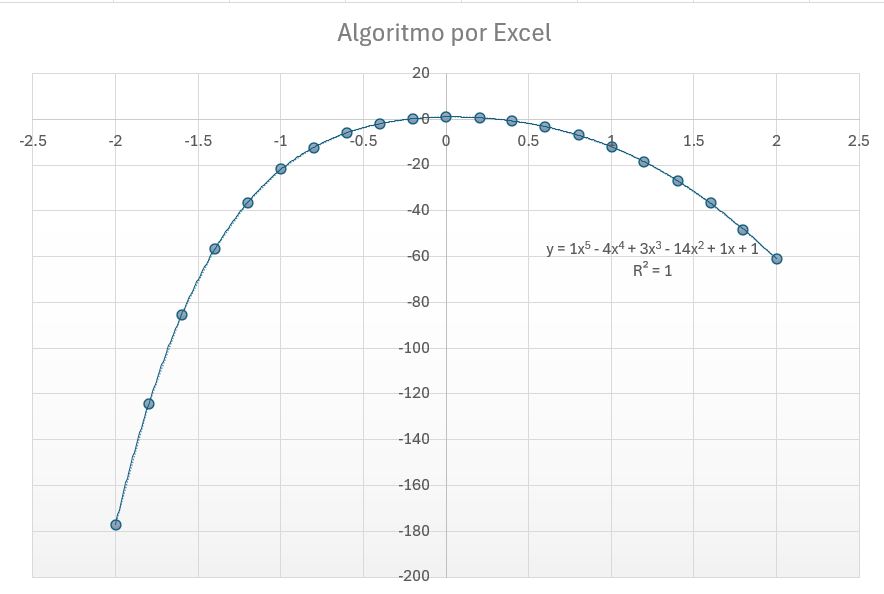

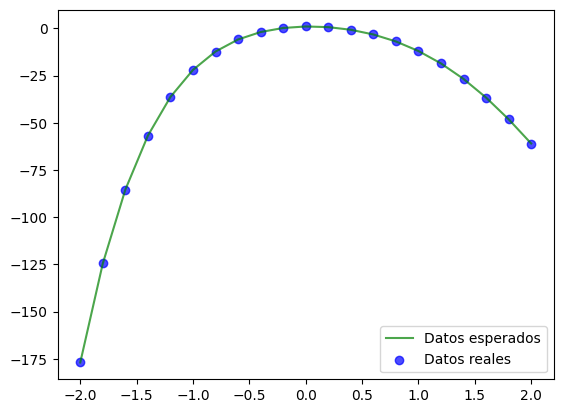

In [ ]:
# Resultado esperado graficado
x_verdadero = bd["x"].values
y_verdadero = 1 + 1 * x_verdadero - 14 * x_verdadero**2 + 3 * x_verdadero**3 - 4 * x_verdadero**4 + 1 * x_verdadero**5
# graficar_resultado(x_verdadero, y_verdadero, [1, 1, 14, 3, 4, 1])
plt.plot(x_verdadero, y_verdadero, color="green", label="Datos esperados", alpha=0.7)
# Puntos originales
plt.scatter(X, Y, color="blue", label="Datos reales", alpha=0.7)
plt.legend()
plt.show()


In [ ]:
X = bd["x"].values
Y = bd["y"].values
n_coef=6
n_bits=8
poblacion_size=20
generaciones= 100
elite_ratio=0.5
Imin = -10
Imax = 10
verbose=True

genoma = n_coef * n_bits
probabilidades = np.full(genoma, 0.5)

PoblacionMayor = []
for i in range(20):
    PoblacionMayor.append(generarPoblacion(n_coef, n_bits))

mejor_fitness_historico = float('inf')

for g in range(generaciones):
        # Generar el fitnes para cada matriz dentro de la población
    
    fitness_vals = []
    for i in range(len(PoblacionMayor)):
        fitness_muestra = fitness(PoblacionMayor[i], X, Y, -10, 10, 8)
        fitness_vals.append(fitness_muestra)
  # Guardar el mejor fitness
    mejor_fitness_actual = min(fitness_vals)
    if mejor_fitness_actual < mejor_fitness_historico:
        mejor_fitness_historico = mejor_fitness_actual
    
    # 2. Ordenar la población de menor a mayor error (mejor a peor)
    indices_ordenados = np.argsort(fitness_vals)
    poblacion_ordenada = [PoblacionMayor[i] for i in indices_ordenados]
    fitness_ordenado = [fitness_vals[i] for i in indices_ordenados]
    
    # 3. Seleccionar la élite (mitad mejor)
    elite_size = int(elite_ratio * poblacion_size)
    elite = poblacion_ordenada[:elite_size]
    
    # 4. Calcular vector de probabilidades desde la élite
    # Convertir la élite a un array 2D (elite_size x genoma)
    elite_array = np.array([ind.flatten() for ind in elite])
    probabilidades = np.mean(elite_array, axis=0)
    
    # 5. Generar nueva mitad de población basada en probabilidades
    nueva_mitad = []
    for _ in range(poblacion_size - elite_size):
        # Generar nuevo individuo usando las probabilidades
        nuevo_individuo = (np.random.random(genoma) < probabilidades).astype(int)
        nuevo_individuo = nuevo_individuo.reshape((n_coef, n_bits))
        nueva_mitad.append(nuevo_individuo)
    
    # 6. Combinar élite con nueva mitad
    PoblacionMayor = elite + nueva_mitad
    
    if verbose and g % 20 == 0:
        print(f"Gen {g} - Mejor error: {mejor_fitness_actual:.6f}")
        print(f"   Peor error: {max(fitness_vals):.6f}")
        print(f"   Probabilidades range: [{np.min(probabilidades):.3f}, {np.max(probabilidades):.3f}]")

print(f"\nMejor solución final: error = {mejor_fitness_historico:.6f}")

 


Gen 0 - Mejor error: 144.690639
   Peor error: 32668.763527
   Probabilidades range: [0.200, 0.800]
Gen 20 - Mejor error: 14.658148
   Peor error: 539.567132
   Probabilidades range: [0.000, 1.000]
Gen 40 - Mejor error: 9.589708
   Peor error: 9.589708
   Probabilidades range: [0.000, 1.000]
Gen 60 - Mejor error: 9.589708
   Peor error: 9.589708
   Probabilidades range: [0.000, 1.000]
Gen 80 - Mejor error: 9.589708
   Peor error: 9.589708
   Probabilidades range: [0.000, 1.000]

Mejor solución final: error = 9.589708


In [ ]:
# Graficamos la mejor solu